<a href="https://colab.research.google.com/github/owilli38/DSBA-6211/blob/main/Forecasting_owilli38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dfOW = pd.read_csv('/content/gas_prod.csv')

In [ ]:
dfOW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     240 non-null    int64  
 1   Gas_prod  240 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


In [ ]:
import pandas as pd

# Assume the sequence starts in January 2004 and ends in December 2023 (12 months x 20 years)
start_date = '2004-01'

# Generate a date range starting from the start_date, with a frequency of one month,
# and length equal to the dataset
dfOW['Date'] = pd.date_range(start=start_date, periods=len(dfOW), freq='M')

# Now you can use the 'Date' column for plotting

<ipython-input-4-96428b5457b6>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfOW['Date'] = pd.date_range(start=start_date, periods=len(dfOW), freq='M')


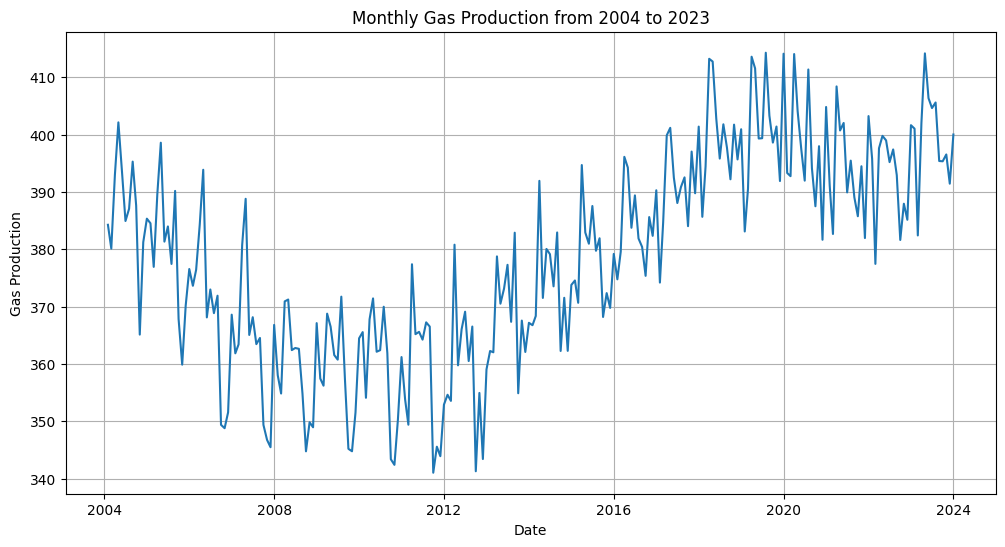

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(dfOW['Date'], dfOW['Gas_prod'])  # Assuming 'GasProd' is the column for gas production
plt.title('Monthly Gas Production from 2004 to 2023')
plt.xlabel('Date')
plt.ylabel('Gas Production')
plt.grid(True)
plt.show()

In [ ]:
# Assuming your 'Date' column is already in datetime format
train_data = dfOW[dfOW['Date'] < '2021-01-01']
validation_data = dfOW[dfOW['Date'] >= '2021-01-01']

In [ ]:
# Linear trend model
import statsmodels.formula.api as smf

# Convert 'Date' to ordinal for linear regression using .loc to avoid the warning
# This represents the date as a numerical value
dfOW['Date_ordinal'] = dfOW['Date'].apply(lambda date: date.toordinal())

# Now create train and validation data using the new column
train_data = dfOW[dfOW['Date'] < '2021-01-01']
validation_data = dfOW[dfOW['Date'] >= '2021-01-01']

# Create and fit the model using the ordinal representation of 'Date'
model_linear = smf.ols('Gas_prod ~ Date_ordinal', data=train_data).fit()

# Make predictions on the validation set
predictions_linear = model_linear.predict(validation_data[['Date_ordinal']]) # Use ordinal for prediction

In [ ]:
# Assuming seasonality is monthly (12 periods)
model_seasonal = smf.ols('Gas_prod ~ C(Date.dt.month)', data=train_data).fit()
predictions_seasonal = model_seasonal.predict(validation_data['Date'])

In [ ]:
# Include both quadratic trend and seasonality
# Convert 'Date' to ordinal for quadratic term calculation using .loc to avoid SettingWithCopyWarning
dfOW['Date_ordinal'] = dfOW['Date'].apply(lambda date: date.toordinal())

# Now create train and validation data using the new column
train_data = dfOW.loc[dfOW['Date'] < '2021-01-01']
validation_data = dfOW.loc[dfOW['Date'] >= '2021-01-01']

# Now use the ordinal representation for the quadratic term in the formula
model_quad_seasonal = smf.ols('Gas_prod ~ Date_ordinal + I(Date_ordinal**2) + C(Date.dt.month)', data=train_data).fit()

# Make predictions using the ordinal representation
predictions_quad_seasonal = model_quad_seasonal.predict(validation_data[['Date_ordinal', 'Date']]) # Use both for prediction

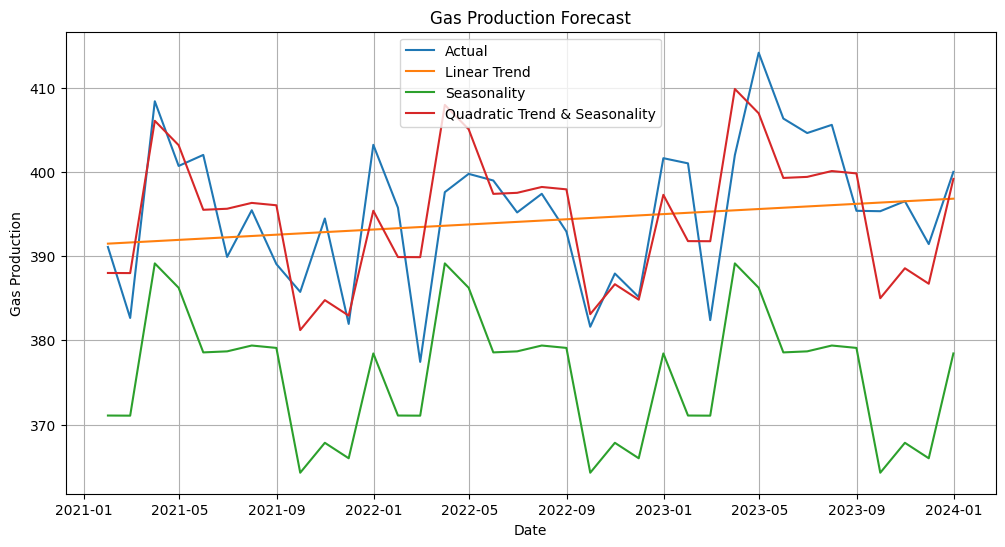

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(validation_data['Date'], validation_data['Gas_prod'], label='Actual')

# Linear trend predictions
plt.plot(validation_data['Date'], predictions_linear, label='Linear Trend')

# Seasonality predictions
plt.plot(validation_data['Date'], predictions_seasonal, label='Seasonality')

# Quadratic trend and seasonality predictions
plt.plot(validation_data['Date'], predictions_quad_seasonal, label='Quadratic Trend & Seasonality')

plt.title('Gas Production Forecast')
plt.xlabel('Date')
plt.ylabel('Gas Production')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(validation_data['Gas_prod'], predictions_linear))
rmse_seasonal = np.sqrt(mean_squared_error(validation_data['Gas_prod'], predictions_seasonal))
rmse_quad_seasonal = np.sqrt(mean_squared_error(validation_data['Gas_prod'], predictions_quad_seasonal))

# Print the RMSE values
print('RMSE for Linear Trend:', rmse_linear)
print('RMSE for Seasonality:', rmse_seasonal)
print('RMSE for Quadratic Trend & Seasonality:', rmse_quad_seasonal)

RMSE for Linear Trend: 8.236354302256087
RMSE for Seasonality: 20.519361933769222
RMSE for Quadratic Trend & Seasonality: 6.09446550677458


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate R-squared and MAE for Linear Trend Model
r2_linear = r2_score(validation_data['Gas_prod'], predictions_linear)
mae_linear = mean_absolute_error(validation_data['Gas_prod'], predictions_linear)

# Calculate R-squared and MAE for Seasonality Model
r2_seasonal = r2_score(validation_data['Gas_prod'], predictions_seasonal)
mae_seasonal = mean_absolute_error(validation_data['Gas_prod'], predictions_seasonal)

# Calculate R-squared and MAE for Quadratic Trend & Seasonality Model
r2_quad_seasonal = r2_score(validation_data['Gas_prod'], predictions_quad_seasonal)
mae_quad_seasonal = mean_absolute_error(validation_data['Gas_prod'], predictions_quad_seasonal)

# Print the values
print('Linear Trend Model:')
print('R-squared:', r2_linear)
print('MAE:', mae_linear)
print('\nSeasonality Model:')
print('R-squared:', r2_seasonal)
print('MAE:', mae_seasonal)
print('\nQuadratic Trend & Seasonality Model:')
print('R-squared:', r2_quad_seasonal)
print('MAE:', mae_quad_seasonal)

Linear Trend Model:
R-squared: 0.03397970991300636
MAE: 6.706325995952263

Seasonality Model:
R-squared: -4.995755458174191
MAE: 19.476369488305714

Quadratic Trend & Seasonality Model:
R-squared: 0.4710830871225873
MAE: 5.196289549005247


In [ ]:
subset_df = dfOW[(dfOW['Date'] >= '2020-01-01') & (dfOW['Date'] <= '2020-12-31')].copy()

subset_df.loc[:, 'SMA_6'] = subset_df['Gas_prod'].rolling(window=6).mean()
subset_df.loc[:, 'ES_0.2'] = subset_df['Gas_prod'].ewm(alpha=0.2).mean()

In [ ]:
display(subset_df[['Date', 'Gas_prod', 'SMA_6', 'ES_0.2']])

,Date,Gas_prod,SMA_6,ES_0.2
192,2020-01-31,393.293956,NaN,393.293956
193,2020-02-29,392.736317,NaN,392.984157
194,2020-03-31,414.025339,NaN,401.607592
195,2020-04-30,404.070565,NaN,402.441932
196,2020-05-31,397.497601,NaN,400.971106
197,2020-06-30,391.957445,398.930204,398.527902
198,2020-07-31,411.332411,401.936613,401.768382
199,2020-08-31,394.125900,402.168210,399.931750
200,2020-09-30,387.490469,397.745732,397.057752
201,2020-10-31,397.962931,396.727793,397.260565


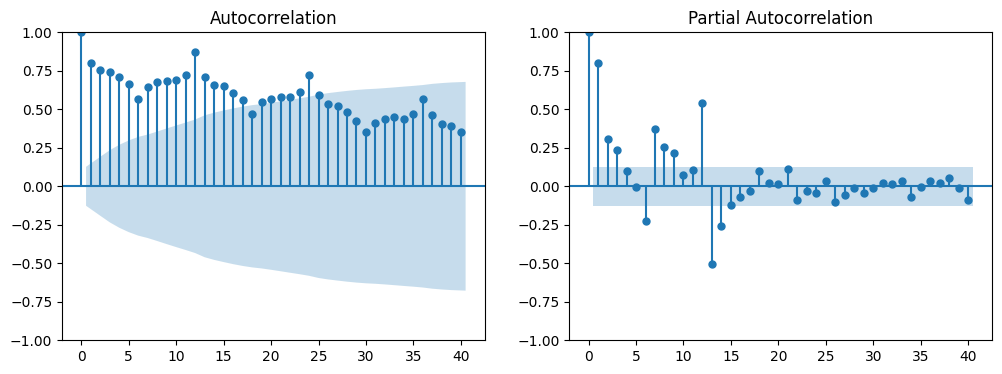

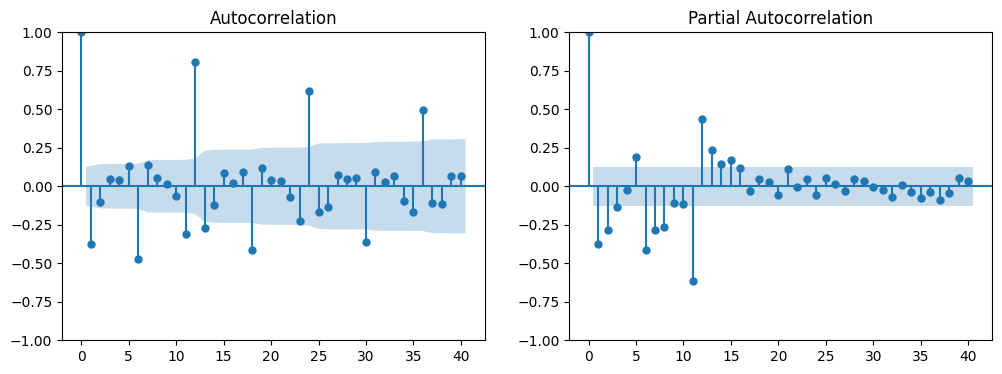

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

dfOW = dfOW.set_index('Date')

# Original Series
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(dfOW['Gas_prod'], lags=40, ax=axes[0])
plot_pacf(dfOW['Gas_prod'], lags=40, ax=axes[1])
plt.show()

# 1st Differencing
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(dfOW['Gas_prod'].diff().dropna(), lags=40, ax=axes[0])
plot_pacf(dfOW['Gas_prod'].diff().dropna(), lags=40, ax=axes[1])
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Ensure 'Date' is the index and is a DatetimeIndex with 'ME' frequency for train_data
train_data = train_data.reset_index()

train_data = train_data.set_index('Date')
train_data.index = pd.DatetimeIndex(train_data.index, freq='ME')

# Fit SARIMA model on training data
modelOW = SARIMAX(train_data['Gas_prod'], order=(1, 1, 1), freq='ME')  # Assuming monthly data with 'ME' frequency
results = modelOW.fit()

# Fit SARIMA model on training data
modelOW = SARIMAX(train_data['Gas_prod'], order=(1, 1, 1), freq='ME') # Assuming monthly data with 'ME' frequency
results = modelOW.fit()

# Make predictions on validation/test data

predictions = results.get_forecast(steps=len(validation_data))
predicted_mean = predictions.predicted_mean

# Align predictions with validation_data dates:
predicted_mean.index = validation_data.index  # Match the index

# Evaluate model performance on validation/test data
rmse = np.sqrt(mean_squared_error(validation_data['Gas_prod'], predicted_mean))
mae = mean_absolute_error(validation_data['Gas_prod'], predicted_mean)
r2 = r2_score(validation_data['Gas_prod'], predicted_mean)

print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

RMSE: 8.8640787746734
MAE: 7.000507303798813
R-squared: -0.11887976987716842


RMSE: 8.8640787746734
MAE: 7.000507303798813
R-squared: -0.11887976987716842


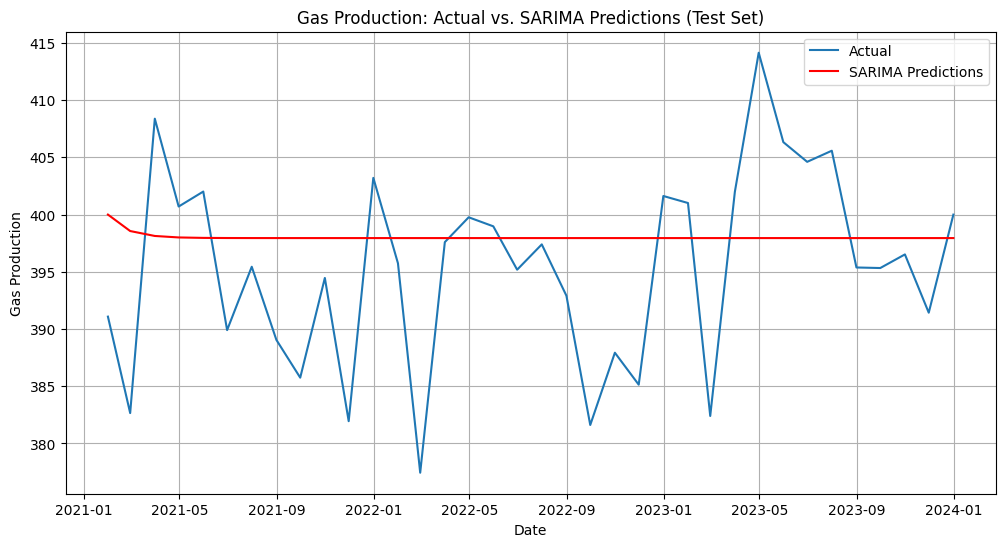

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Filter data for the test set (2021 to 2024)
test_data = dfOW[(dfOW.index >= '2021-01-01') & (dfOW.index <= '2024-01-01')]


plt.plot(test_data.index, test_data['Gas_prod'], label='Actual')


start_date = train_data.index.max() + pd.DateOffset(months=1)
end_date = validation_data.index.max()
predictions_one_step_ahead_mean = results.get_prediction(start=start_date,
                                                         end=end_date).predicted_mean


# Evaluate model performance on validation/test data
rmse = np.sqrt(mean_squared_error(validation_data['Gas_prod'], predicted_mean))
mae = mean_absolute_error(validation_data['Gas_prod'], predicted_mean)
r2 = r2_score(validation_data['Gas_prod'], predicted_mean)

print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot SARIMA predictions using the extracted mean values
# Filter predictions to match the test set's date range
predictions_test_set = predictions_one_step_ahead_mean[(predictions_one_step_ahead_mean.index >= '2021-01-01') & (predictions_one_step_ahead_mean.index <= '2024-01-01')]
plt.plot(predictions_test_set.index, predictions_test_set, label='SARIMA Predictions', color='red')

plt.title('Gas Production: Actual vs. SARIMA Predictions (Test Set)')
plt.xlabel('Date')
plt.ylabel('Gas Production')
plt.legend()
plt.grid(True)
plt.show()